In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc


In [2]:
df = pd.read_csv("chd-201015-202131 - chd-201015-202131.csv")


In [3]:
X = df[['AGE']]
y = df['CHD']


In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)


In [5]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [6]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [7]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

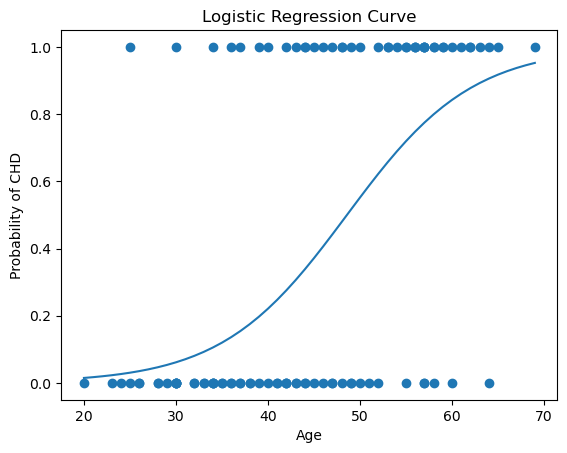

In [8]:
age_range = pd.DataFrame({'AGE': range(int(df.AGE.min()), int(df.AGE.max()) + 1)})
age_scaled = scaler.transform(age_range)
prob_curve = model.predict_proba(age_scaled)[:, 1]

plt.figure()
plt.scatter(df['AGE'], df['CHD'])
plt.plot(age_range['AGE'], prob_curve)
plt.xlabel("Age")
plt.ylabel("Probability of CHD")
plt.title("Logistic Regression Curve")
plt.show()

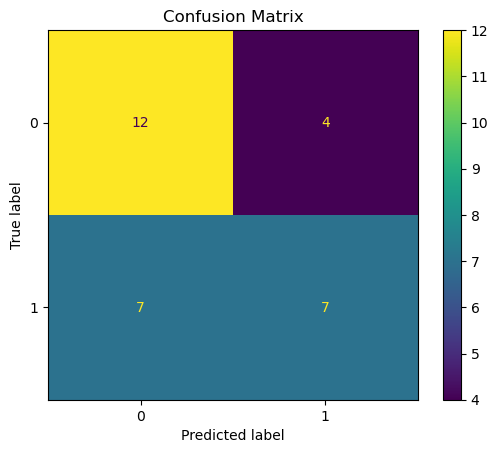

In [9]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix")
plt.show()

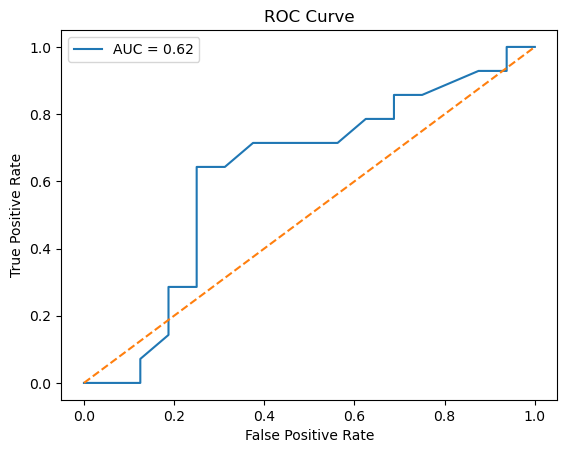

In [10]:
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()